In [2]:
!python -V

Python 3.9.12


In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
import mlflow


mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/workspaces/CVT--MLOps/mlruns/1', creation_time=1724175707257, experiment_id='1', last_update_time=1724175707257, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [9]:
pip install pandas pyarrow


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Read the Parquet file from the URL
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

# Display the dataframe
print(df.head())



   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1         2  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2         2  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3         2  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
4         2  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           151              1.0           1.01   
1         1.0           166           239              1.0           2.53   
2         1.0            41            42              1.0           1.12   
3         1.0           168            75              1.0           1.99   
4         2.0           265           265              3.0           0.00   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0   

In [12]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [13]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [14]:


# Assuming df is your DataFrame
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)



In [15]:
import pandas as pd

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)



In [16]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [17]:
!pip install seaborn


/tmp/ipykernel_1330/3223282089.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


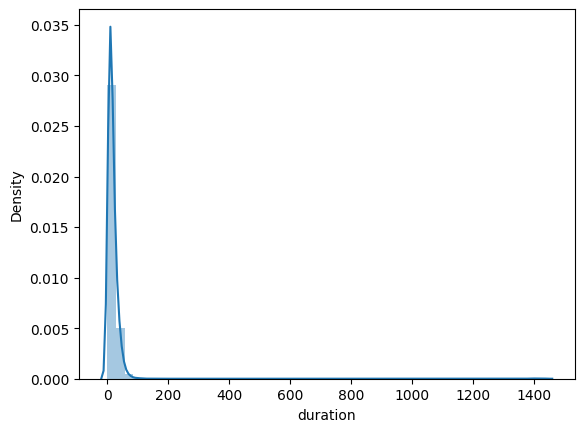

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column named 'duration'
sns.distplot(df.duration)

# Optionally, show the plot
plt.show()


In [19]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [20]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [21]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [22]:
df[categorical].dtypes   # here PULoc, DOLoc are integers not categorical

PULocationID    int64
DOLocationID    int64
dtype: object

In [23]:
df[categorical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [24]:
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_1330/1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [25]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [26]:
train_dicts = df[categorical + numerical].iloc[:10].to_dict(orient='records')

In [27]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [28]:
X_train

<10x18 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [29]:
dv.feature_names_

['DOLocationID=151',
 'DOLocationID=213',
 'DOLocationID=238',
 'DOLocationID=239',
 'DOLocationID=244',
 'DOLocationID=265',
 'DOLocationID=42',
 'DOLocationID=60',
 'DOLocationID=75',
 'PULocationID=166',
 'PULocationID=168',
 'PULocationID=225',
 'PULocationID=244',
 'PULocationID=41',
 'PULocationID=43',
 'PULocationID=74',
 'PULocationID=75',
 'trip_distance']

In [30]:
target = 'duration'
y_train = df[target].values

In [31]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example DataFrame
df = pd.DataFrame({
    'PULocationID': [1, 2, 3, 4, 5],
    'DOLocationID': [10, 20, 30, 40, 50],
    'trip_distance': [100, 200, 300, 400, 500]
})

# Define X and y
X = df[['PULocationID', 'DOLocationID']]  # Independent variables (features)
y = df['trip_distance']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:

y_pred = lr.predict(X_train)


/tmp/ipykernel_1330/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1330/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


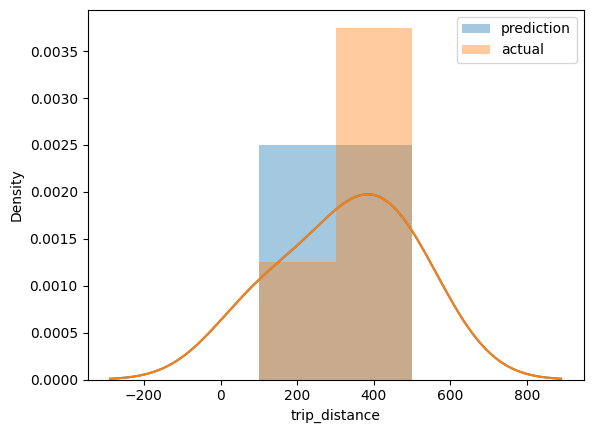

In [34]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [35]:
from sklearn.metrics import mean_squared_error


In [36]:
mean_squared_error(y_train, y_pred, squared=False)

/workspaces/CVT--MLOps/mlflow-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.644125458514252e-14

In [37]:
def read_dataframe(filename):
    # Read the Parquet file from the URL
    df = pd.read_parquet(filename)


    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
    

In [38]:
import pandas as pd

df_train = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')


In [39]:
len(df_train), len(df_val)

(76518, 64572)

In [40]:
print(df.columns)


Index(['PULocationID', 'DOLocationID', 'trip_distance'], dtype='object')


In [41]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df[categorical + numerical].iloc[:10].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [42]:
print(df_train.columns)


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


In [43]:
print(df_train.columns)


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


In [44]:
df_train['lpep_pickup_datetime'] = pd.to_datetime(df_train['lpep_pickup_datetime'])
df_train['lpep_dropoff_datetime'] = pd.to_datetime(df_train['lpep_dropoff_datetime'])

df_val['lpep_pickup_datetime'] = pd.to_datetime(df_val['lpep_pickup_datetime'])
df_val['lpep_dropoff_datetime'] = pd.to_datetime(df_val['lpep_dropoff_datetime'])


In [45]:
print(df_train[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].dtypes)


lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
dtype: object


In [46]:
df_train['duration'] = (df_train['lpep_dropoff_datetime'] - df_train['lpep_pickup_datetime']).dt.total_seconds() / 60
df_val['duration'] = (df_val['lpep_dropoff_datetime'] - df_val['lpep_pickup_datetime']).dt.total_seconds() / 60


In [47]:
print(df_train[['duration']].head())


   duration
0  3.933333
1  8.750000
2  5.966667
3  7.083333
4  0.066667


In [48]:
y_train = df_train['duration'].values
y_val = df_val['duration'].values


In [49]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [50]:
import pandas as pd

# Convert the dictionary to a pandas DataFrame
data = pd.DataFrame({
    'PULocationID': [1, 2, 3],
    'DOLocationID': [4, 5, 6],
    'trip_distance': [2.5, 3.0, 4.2]
})

# Now, you can select the features and target
X = data[['PULocationID', 'DOLocationID']]  # Features (now correctly a DataFrame)
y = data['trip_distance']  # Target (now correctly a Series)

print(X)
print(y)


   PULocationID  DOLocationID
0             1             4
1             2             5
2             3             6
0    2.5
1    3.0
2    4.2
Name: trip_distance, dtype: float64


In [51]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape)  # Should print (n_samples, n_features)
print(y_train.shape)  # Should print (n_samples,)


(2, 2)
(2,)


In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_val, y_val are already defined

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_val)

# Calculate and print Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.6999999999999993


/workspaces/CVT--MLOps/mlflow-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/workspaces/CVT--MLOps/mlflow-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.6999999999999993

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [55]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# Example DataFrame
data = {
    'PULocationID': [1, 2, 3],
    'DOLocationID': [4, 5, 6],
    'trip_distance': [2.5, 3.0, 4.2]
}
df = pd.DataFrame(data)

# Column lists (make sure these match your DataFrame columns)
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Verify columns exist
print(df.columns)  # Check available columns

# Convert DataFrame to dictionary
train_dicts = df[categorical + numerical].to_dict(orient='records')

# Vectorize data
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


Index(['PULocationID', 'DOLocationID', 'trip_distance'], dtype='object')


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt  # Also necessary for plt.legend() to work


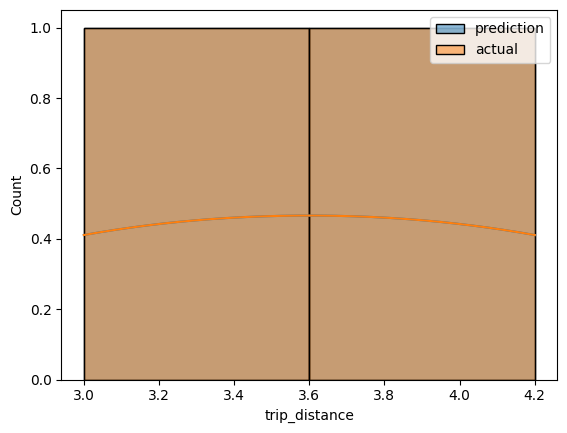

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred and y_train are defined

# Create distribution plots
sns.histplot(y_pred, label='prediction', kde=True)  # kde=True adds a Kernel Density Estimate line
sns.histplot(y_train, label='actual', kde=True)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [58]:
def read_dataframe(filename):
    # Read the Parquet file from the URL
    df = pd.read_parquet(filename)


    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example data (replace with your actual data)
df = pd.DataFrame({
    'PULocationID': [1, 2, 3, 4, 5],
    'DOLocationID': [6, 7, 8, 9, 10],
    'trip_distance': [2.5, 3.0, 4.2, 5.1, 6.3]
})

# Split into training and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

# Now check the lengths
print(len(df_train), len(df_val))


4 1


In [60]:
df_train['PU_DO'] = df_train['PULocationID'].astype(str) + '_' + df_train['DOLocationID'].astype(str)
df_val['PU_DO'] = df_val['PULocationID'].astype(str) + '_' + df_val['DOLocationID'].astype(str)

In [61]:
df


,PULocationID,DOLocationID,trip_distance
0,1,6,2.5
1,2,7,3.0
2,3,8,4.2
3,4,9,5.1
4,5,10,6.3


In [62]:
# Assuming you want to predict 'trip_distance'
target = 'trip_distance'

# Extract the target variable from the training and validation DataFrames
y_train = df_train[target].values
y_val = df_val[target].values


In [63]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(3, 3)
(4,)


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example data
data = pd.DataFrame({
    'PULocationID': [1, 2, 3, 4, 5],
    'DOLocationID': [6, 7, 8, 9, 10],
    'trip_distance': [2.5, 3.0, 4.2, 5.1, 6.3]
})

# Define features and target
X = data[['PULocationID', 'DOLocationID']]
y = data['trip_distance']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(X_train.shape)
print(y_train.shape)


(4, 2)
(4,)


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)


In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_val)

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.35714285714285765


In [68]:
import os
import pickle

# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Example model and vectorizer
dv = ...  # Your DataVectorizer or equivalent
lr = ...  # Your LinearRegression model

# Save the model to a file
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [69]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with a specific alpha value
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Predict on the validation set
y_pred = lasso.predict(X_val)

# Optionally, evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.362857142857143


In [70]:
import mlflow  # Import MLflow at the beginning of your script
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Start an MLflow run
with mlflow.start_run():
    
    # Set a tag for the run
    mlflow.set_tag("developer", "preethi")
    
    # Log parameters (e.g., file paths and alpha value)
    mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
    mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
    alpha = 0.01
    mlflow.log_param("alpha", alpha)

    # Initialize the Lasso model with a specific alpha value
    lasso = Lasso(alpha=alpha)

    # Fit the model to the training data
    lasso.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = lasso.predict(X_val)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    # Log the RMSE as a metric
    mlflow.log_metric("rmse", rmse)

    # Print the RMSE
    print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.362857142857143


/workspaces/CVT--MLOps/mlflow-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
from sklearn.linear_model import Lasso
# Initialize the Lasso model with a specific alpha value
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Predict on the validation set
y_pred = lasso.predict(X_val)

# Optionally, evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.362857142857143
